<h3>>> Import libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>>> Import data</h3>

In [2]:
df = pd.read_csv('./data/acceleration_data_in_bilbao_SP.csv')
df.head()

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,vehicle_make,vehicle_model,vehicle_type,road_type
0,2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.0,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
1,2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.0,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
2,2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.0,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
3,2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.0,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
4,2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.0,40,MAN,TGX,truck,LOCAL_ROAD_OF_MAJOR_IMPORTANCE


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262443 entries, 0 to 262442
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   time              262443 non-null  object 
 1   acc_x             262443 non-null  float64
 2   acc_y             262443 non-null  float64
 3   acc_z             262443 non-null  float64
 4   speed             262443 non-null  float64
 5   latitude          262443 non-null  float64
 6   longitude         262443 non-null  float64
 7   heading           262443 non-null  float64
 8   road_speed_limit  262443 non-null  int64  
 9   vehicle_make      262443 non-null  object 
 10  vehicle_model     262443 non-null  object 
 11  vehicle_type      262443 non-null  object 
 12  road_type         262443 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 26.0+ MB


<p>Fortunately, the dataset doesn't have any missing values.<br>
but we should change the <q>time</q> column to datetime type.
</p>

In [4]:
# Change time column type to datetime
df["time"] = pd.to_datetime(df["time"])

# Sort the dataset by increasing time
df.sort_values(by=['time'], inplace=True)

In [5]:
# Specify the numerical and categorical variable
categorical_columns = ["vehicle_make","vehicle_model","vehicle_type","road_type"] 
numerical_columns = ["acc_x","acc_y","acc_z","speed","latitude","longitude","heading","road_speed_limit"] 

In [6]:
# Which categorical variables can help us to creat a model ?
for i in range(len(categorical_columns)):
    print("------------------------------")
    print(categorical_columns[i])
    print("number of unique elements in {1} is {0}".format(df[categorical_columns[i]].nunique(), categorical_columns[i]))
    print(df[categorical_columns[i]].unique())

------------------------------
vehicle_make
number of unique elements in vehicle_make is 1
['MAN']
------------------------------
vehicle_model
number of unique elements in vehicle_model is 1
['TGX']
------------------------------
vehicle_type
number of unique elements in vehicle_type is 1
['truck']
------------------------------
road_type
number of unique elements in road_type is 7
['LOCAL_ROAD_OF_MAJOR_IMPORTANCE' 'CONNECTING_ROAD' 'MAJOR_ROAD'
 'SECONDARY_ROAD' 'MOTORWAY' 'DESTINATION_ROAD'
 'MAJOR_ROAD_OF_HIGH_IMPORTANCE']


<p>
Due to the<q>vehicle_make</q>, <q>vehicle_model</q> and <q>vehicle_type</q> columns having one unique observation and can't help us to get insight from the data, I remove these columns from the dataset.
</p>

In [7]:
# Remove  vehicle_make, vehicle_model and vehicle_type
del df["vehicle_make"], df["vehicle_model"], df["vehicle_type"]
df.head()

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,road_type
0,2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
1,2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
2,2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
3,2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE
4,2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE


<h3>>> Checking the time interval of data recording</h3>

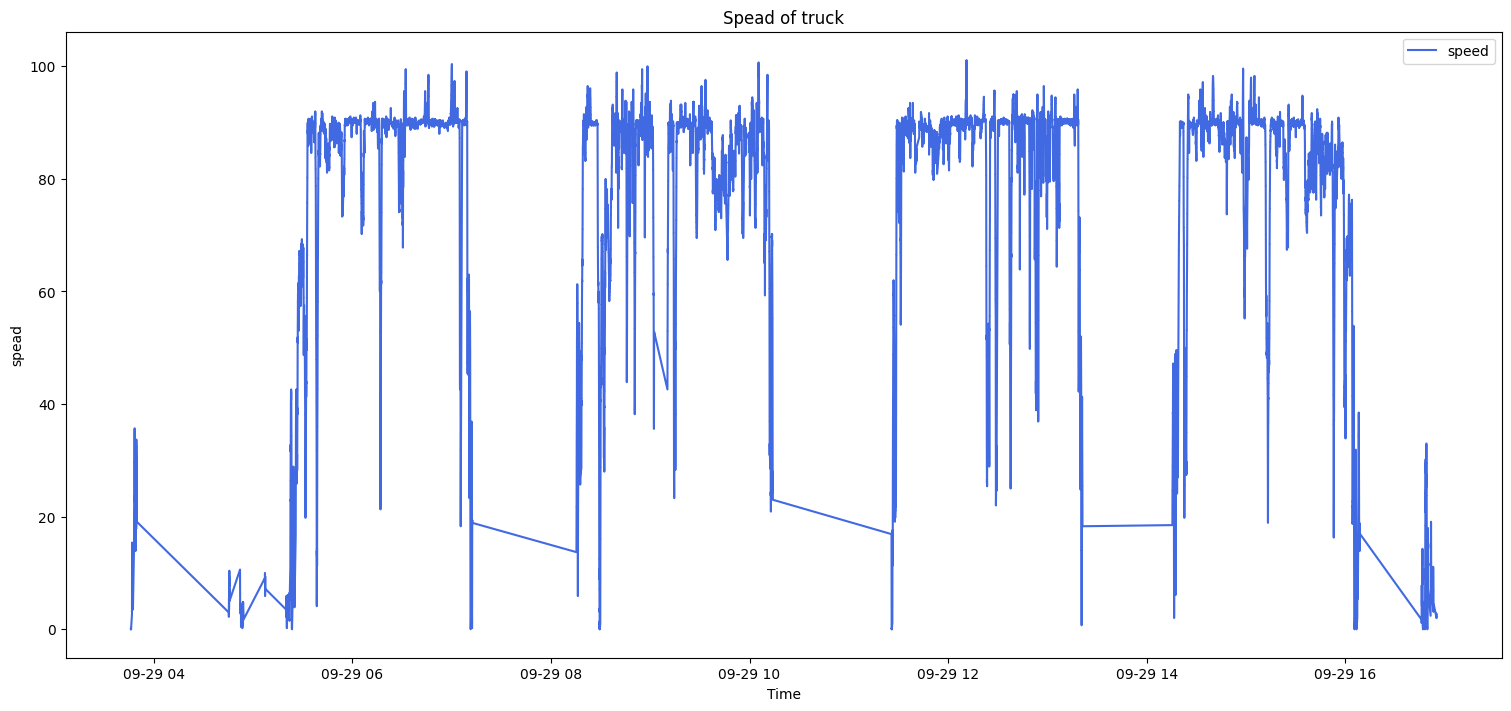

In [8]:
fig, ax = plt.subplots(figsize=(15, 7), layout='constrained')
ax.plot(df['time'], df["speed"], label='speed', color='royalblue')
ax.set_xlabel('Time')
ax.set_ylabel('spead')
ax.set_title("Spead of truck")
ax.legend()

<p style='color:red'><b>Some times sensor doesn't work properly and made some gaps in our chart !!!</b></p>
<p>So I make some analysis on the time column.</p>

In [9]:
# Create a new column to represent the time between two rows that were recorded.   
df['last_time_recorded'] = df["time"].shift(1)
df['diff_time'] = df["time"]-df["last_time_recorded"]

# We don't need this column("last_time_recorded") anymore.
del df['last_time_recorded']

df.head()

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,road_type,diff_time
0,2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaT
1,2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000
2,2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000
3,2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000
4,2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000


In [10]:
df["diff_time"].sort_values(ascending=False).head(10)

201215   0 days 01:11:40.117000
127370   0 days 01:02:55.096000
1179     0 days 00:55:32.045000
216917   0 days 00:54:19.100000
227579   0 days 00:37:22.048000
2283     0 days 00:12:56.110000
2413     0 days 00:12:36.138000
193054   0 days 00:08:00.107000
1471     0 days 00:06:21.062000
209390   0 days 00:01:39.078000
Name: diff_time, dtype: timedelta64[ns]

<p>
When we see the highest 10-period time that the sensor doesn't record data, we can find out that the driver turned the car off or the sensor didn't recognize any movement, or maybe the sensor had a problem.<br>
I have an idea to create a new column(<q>trip</q>) to show the truck's sensor working perfectly and doesn't have any gap during recording data.<br>
Because these gaps can confuse our model when we want to detect anomalies.
</p>

In [11]:
day = 0                 # 1, 2, 3, ...
hour = 0                # 1 to 23
minute = 0              # 0 to 59 
second = 5              # 0 to 59
millisecond = 0         # 0 to 999999

# If the sensor doesn't record data for "minimum_sensor_off" consider that another trip started 
minimum_sensor_off = f"{day} days {hour:02d}:{minute:02d}:{second:02d}.{millisecond:06d}"

off_sensor = df.loc[df["diff_time"] >= minimum_sensor_off].sort_index().index
len_sensor__off = len(off_sensor)

df['trip'] = pd.NA
for i in range(len_sensor__off):
    df.loc[off_sensor[i]-1, 'trip'] = i

df['trip'].bfill(inplace=True)
df['trip'].fillna(value=len_sensor__off, inplace=True)

df.head()

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,road_type,diff_time,trip
0,2022-09-29 03:46:06.458,-0.030,-0.028,1.009,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,NaT,0
1,2022-09-29 03:46:06.558,-0.032,-0.029,1.008,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000,0
2,2022-09-29 03:46:06.658,-0.029,-0.027,1.008,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000,0
3,2022-09-29 03:46:06.758,-0.028,-0.029,1.009,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000,0
4,2022-09-29 03:46:06.858,-0.030,-0.029,1.015,0.0,43.238934,-2.877811,318.0,40,LOCAL_ROAD_OF_MAJOR_IMPORTANCE,0 days 00:00:00.100000,0


<p>If we have a trip that doesn't have enough data, It can't help us to find patterns.</p>

In [12]:
minimum_trip_observation = 5000

trip_data = df["trip"].value_counts().sort_values(ascending=False)[df["trip"].value_counts().sort_values(ascending=False)>=minimum_trip_observation]
trip_data

51    37979
21    34241
46    22768
37    21402
62    21364
38    19455
17    18911
34    18580
43     5717
18     5435
Name: trip, dtype: int64

<p>Create a new data frame that contains just trips with sufficient data.</p>

In [13]:
dataset = df.loc[df["trip"].isin(trip_data.index)].copy()
dataset.sort_values(by=["time"], inplace=True)

<hr>

<h2>>> EDA</h2>

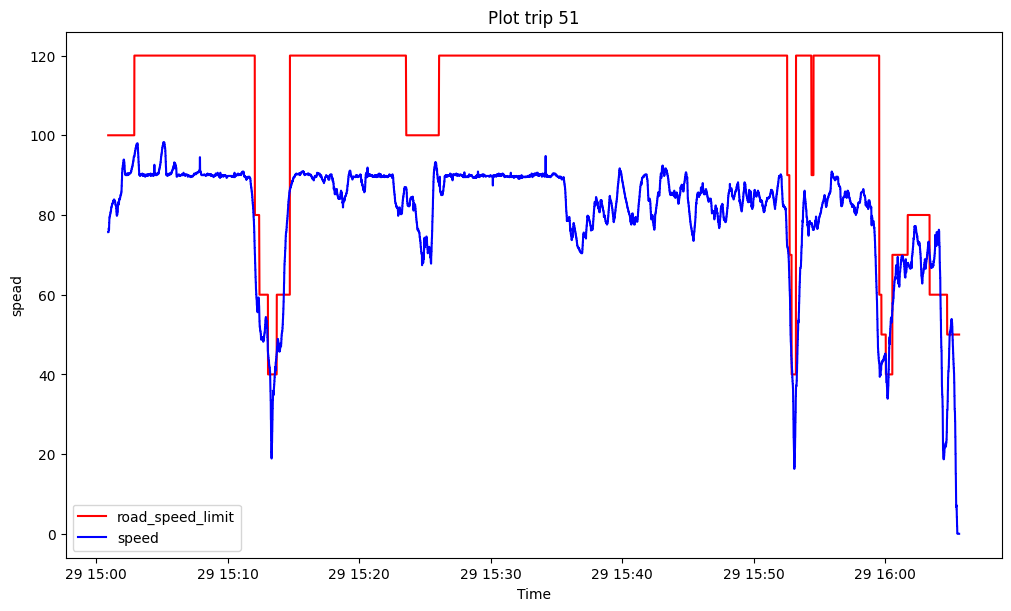

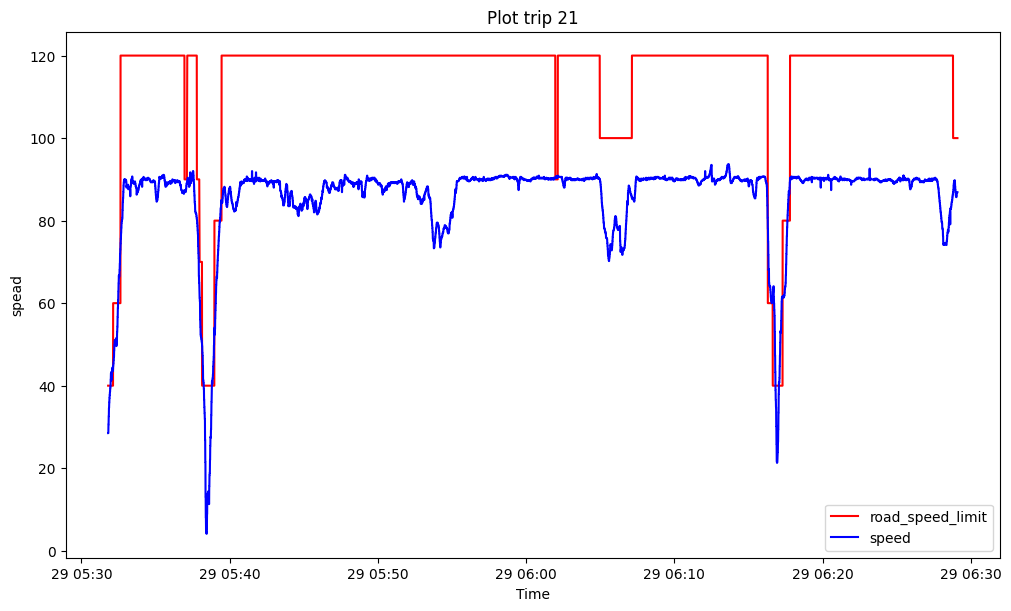

In [14]:
n_trips_plot = 2
plot_list = trip_data.index[0:n_trips_plot]

for i in plot_list:
    df_plot = dataset.loc[dataset['trip']==i].copy()

    fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
    ax.plot(df_plot['time'], df_plot["road_speed_limit"], label='road_speed_limit', color='red')  # Plot some data on the axes.
    ax.plot(df_plot['time'], df_plot["speed"], label='speed', color='blue')  # Plot more data on the axes...
    ax.set_xlabel('Time')
    ax.set_ylabel('spead')
    ax.set_title(f"Plot trip {i}")
    ax.legend()

<p>
The graphs show us that the driver follows the driving rules and pays attention to the speed limit signs and adjusts the speed of the car accordingly.<br>
When the speed limit decreases the driver decreases the speed of the truck and vice versa.
Therefore, we conclude that the speed limit can affect the performance of the accelerometer.
</p>

<hr>

<p>After searching a little bit about accelerometer data and watching a video about visualizing driving data, I found out that acc_z column can help us to detect obstacles on the roads.</p>
<p>Video: <a>https://www.youtube.com/watch?v=a96PO823veM</a></p>

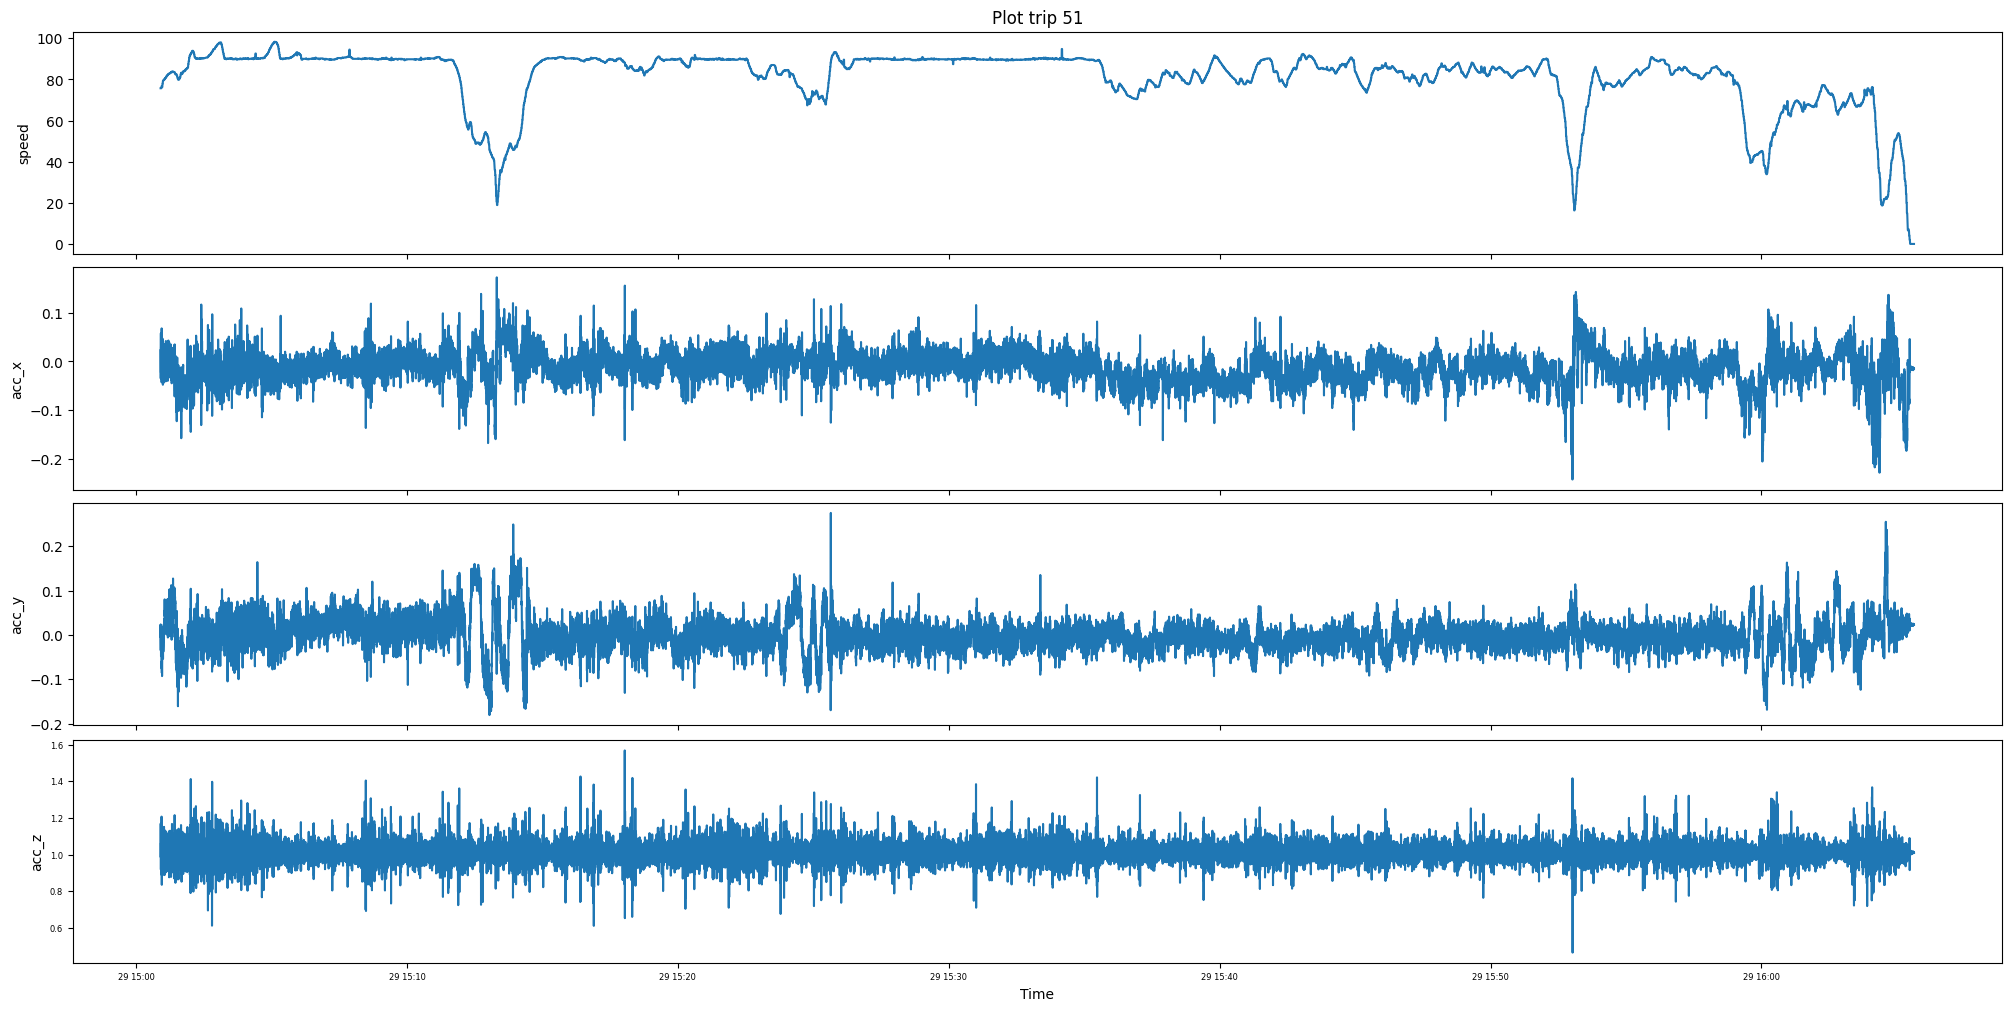

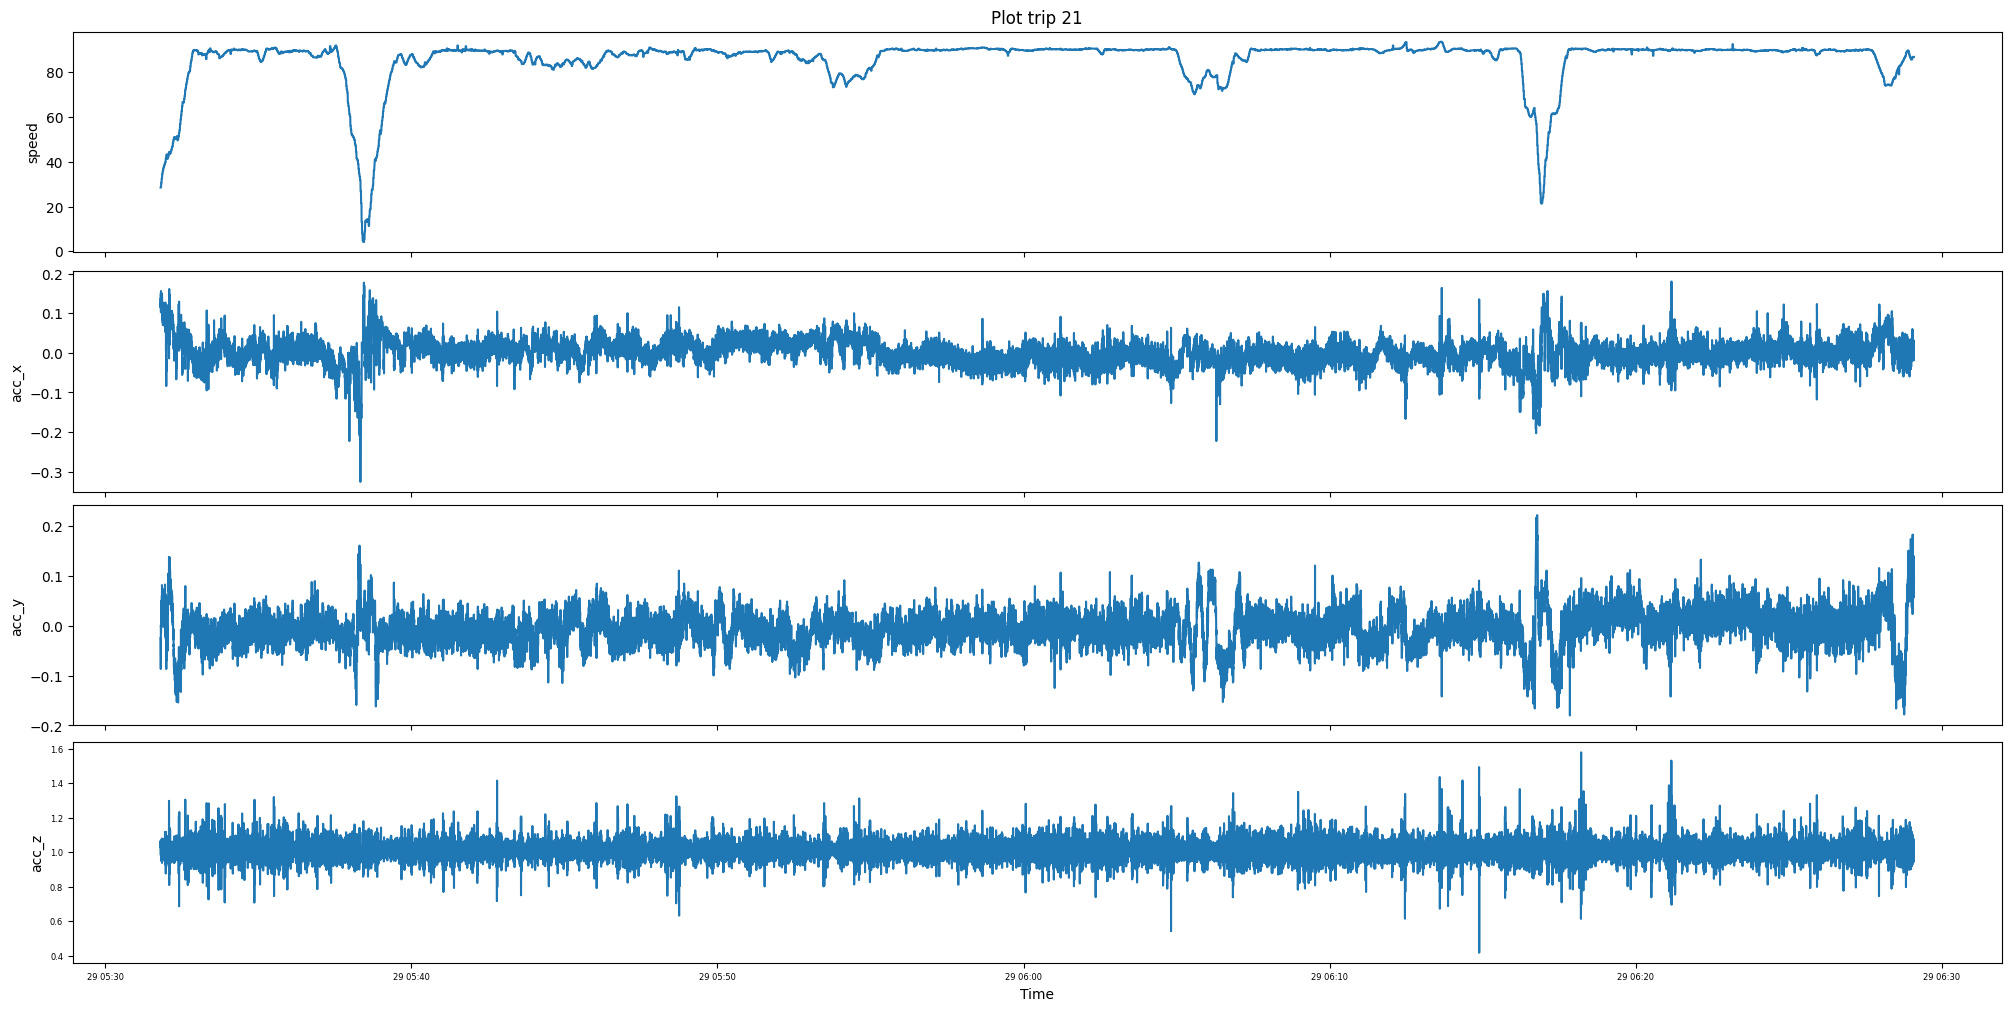

In [15]:
n_trips_plot = 2
plot_list = trip_data.index[0:n_trips_plot]
for i in plot_list:

    df_plot = dataset.loc[dataset['trip']==i].copy()
    fig, ax = plt.subplots(figsize=(20, 10), layout='constrained')
    
    ax0 = plt.subplot(411)
    plt.plot(df_plot['time'], df_plot['speed'])
    plt.tick_params(labelbottom=False)
    plt.ylabel('speed')
    plt.title(f"Plot trip {i}")

    ax1 = plt.subplot(412)
    plt.plot(df_plot['time'], df_plot['acc_x'])
    plt.tick_params(labelbottom=False)
    plt.ylabel('acc_x')
    
    # share x only
    ax2 = plt.subplot(413, sharex=ax1)
    plt.plot(df_plot['time'], df_plot['acc_y'])
    plt.tick_params(labelbottom=False)
    plt.ylabel('acc_y')
    
    # share x and y
    ax3 = plt.subplot(414, sharex=ax1)     
    plt.plot(df_plot['time'], df_plot['acc_z'])
    plt.tick_params(labelsize=6)
    plt.ylabel('acc_z')
    plt.xlabel('Time')
    
    plt.show()

<hr>

<p>So whats the plan?</p>
<ol>
    <li>Find the anomalies in the <q>acc_z</q> column</li>
    <li>clustering this anomalies</li>
</ol>

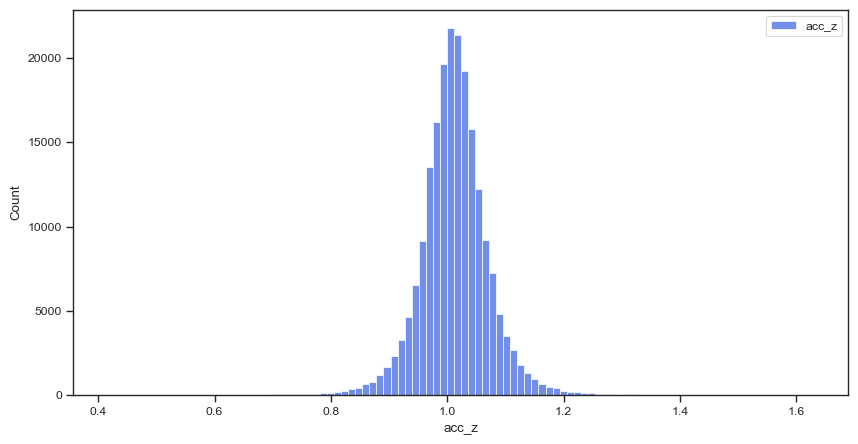

The average of z accelerometer is 1.01


In [16]:
sns.set_style("ticks")
sns.set_context("paper")
plt.figure(figsize=(10,5))
sns.histplot(data=dataset["acc_z"], color='royalblue', label="acc_z", bins=100)
plt.legend() 
plt.show()

print("The average of z accelerometer is {0}".format(round(dataset["acc_z"].mean(),2)))


In [17]:
# Define a function to calculate the confidence interval
def confidence_interval_calculator(x:list, confidence:float=0.95)->list:
    """
    Calculate confidense interval of a list
    x: list
    confidence: float     0 < confidence < 1
    result:list
    """
    assert 0< confidence < 1 , "confidence expects a value between 0 and 1"
    
    return list(np.percentile(x, [100*(1-confidence)/2, 100*(1-(1-confidence)/2)]))

confidence = 0.995
confidence_interval = confidence_interval_calculator(x=dataset["acc_z"], confidence=confidence)
print(confidence_interval)

[0.793, 1.241]


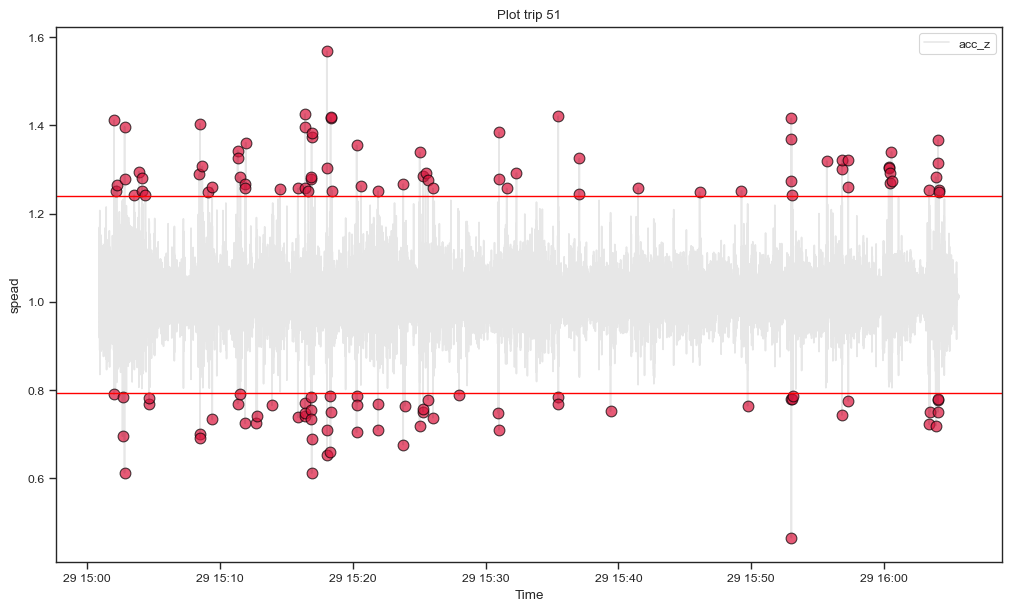

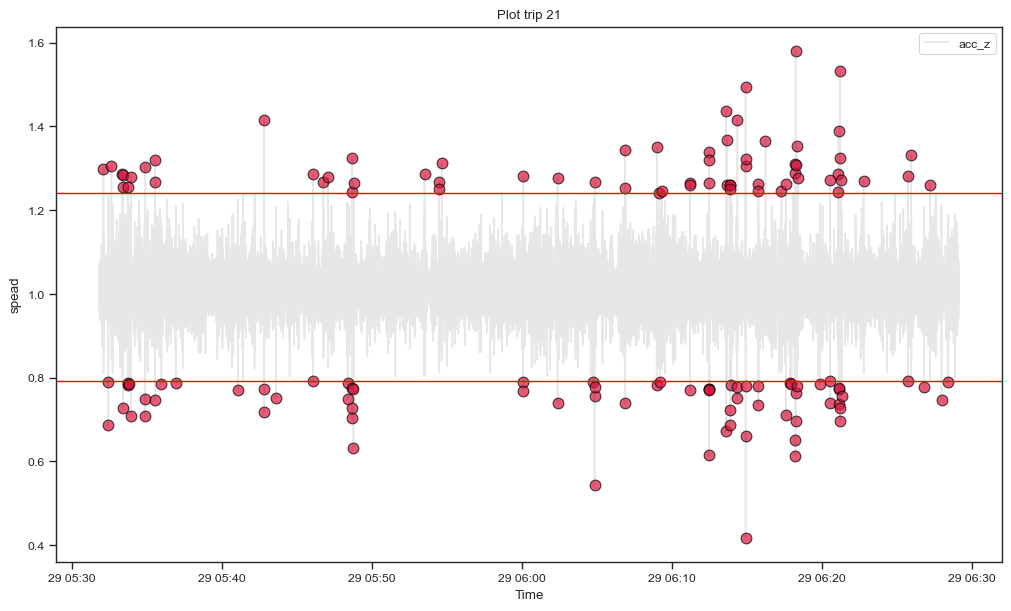

In [18]:
n_trips_plot = 2
plot_list = trip_data.index[0:n_trips_plot]

for i in plot_list:
    df_plot = dataset.loc[dataset['trip']==i].copy()
    df_plot['anomalies'] = df_plot['acc_z'].apply(lambda x : x if x<confidence_interval[0] or x>confidence_interval[1] else np.nan)


    fig, ax = plt.subplots(figsize=(10, 6), layout='constrained')
    ax.plot(df_plot['time'], df_plot["acc_z"], label='acc_z', color=(0.1,0.1,0.1,0.1))  # Plot some data on the axes.
    ax.set_xlabel('Time')
    ax.set_ylabel('spead')
    ax.set_title(f"Plot trip {i}")
    ax.axhline(y=confidence_interval[0], linewidth=1, color='r', ls='-')
    ax.axhline(y=confidence_interval[1], linewidth=1, color='r', ls='-')

    ax.scatter(df_plot["time"], df_plot["anomalies"], s=60, color='crimson',alpha=0.7, edgecolors="k")
    ax.legend()

In [19]:
dataset.head()

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,road_type,diff_time,trip
95144,2022-09-29 05:31:48.099,0.136,-0.025,1.032,28.5,43.202620,-2.894360,247.00000,40,SECONDARY_ROAD,0 days 00:00:11.100000,21
95145,2022-09-29 05:31:48.199,0.114,-0.048,1.064,28.5,43.202618,-2.894369,247.34312,40,SECONDARY_ROAD,0 days 00:00:00.100000,21
95146,2022-09-29 05:31:48.299,0.123,-0.059,1.031,28.5,43.202614,-2.894378,247.99690,40,SECONDARY_ROAD,0 days 00:00:00.100000,21
95147,2022-09-29 05:31:48.399,0.123,-0.048,1.009,28.5,43.202614,-2.894388,248.79538,40,SECONDARY_ROAD,0 days 00:00:00.100000,21
95148,2022-09-29 05:31:48.499,0.120,-0.087,0.997,28.5,43.202610,-2.894397,249.44058,40,SECONDARY_ROAD,0 days 00:00:00.100000,21


In [20]:
def feature_engineering(dataframe:pd.DataFrame, confidence_list:list=[0.999,0.95], anomalies_side:str='both') -> pd.DataFrame :
    """
    Add Column to the Dataset to find the anomalies with "confidence_list" levels.

    dataframe : pd.DataFrame                    Dataframe which contains "acc_z" column
    confidence_list : list                      Levels of confidence interval
    anomalies_side:'upper','lower','both'       Which side of the line anomalies should be detected? 
    """
    assert anomalies_side in ['upper','lower','both'] , "anomalies_side expects a value like of these : 'upper','lower','both' "
    
    df = dataframe.copy()
    for confidence in confidence_list:
        confidence_interval = confidence_interval_calculator(x=df["acc_z"], confidence=confidence)
        if anomalies_side=='both':
            df[f'anomalies_z_{confidence}'] = df['acc_z'].apply(lambda x : True if x<confidence_interval[0] or x>confidence_interval[1] else False)
        elif anomalies_side=='upper':
            df[f'anomalies_z_{confidence}'] = df['acc_z'].apply(lambda x : True if x>confidence_interval[1] else False)
        elif anomalies_side=='lower':
            df[f'anomalies_z_{confidence}'] = df['acc_z'].apply(lambda x : True if x<confidence_interval[0] else False)
        else:
            print(" invalid anomalies_side; please enter one of thees chioces. ['upper','lower','both'] ")
        
    return df

confidence_list = [0.99,0.95]

dataset = feature_engineering(dataframe=dataset, confidence_list=confidence_list, anomalies_side='upper')
dataset.head()

,time,acc_x,acc_y,acc_z,speed,latitude,longitude,heading,road_speed_limit,road_type,diff_time,trip,anomalies_z_0.99,anomalies_z_0.95
95144,2022-09-29 05:31:48.099,0.136,-0.025,1.032,28.5,43.202620,-2.894360,247.00000,40,SECONDARY_ROAD,0 days 00:00:11.100000,21,False,False
95145,2022-09-29 05:31:48.199,0.114,-0.048,1.064,28.5,43.202618,-2.894369,247.34312,40,SECONDARY_ROAD,0 days 00:00:00.100000,21,False,False
95146,2022-09-29 05:31:48.299,0.123,-0.059,1.031,28.5,43.202614,-2.894378,247.99690,40,SECONDARY_ROAD,0 days 00:00:00.100000,21,False,False
95147,2022-09-29 05:31:48.399,0.123,-0.048,1.009,28.5,43.202614,-2.894388,248.79538,40,SECONDARY_ROAD,0 days 00:00:00.100000,21,False,False
95148,2022-09-29 05:31:48.499,0.120,-0.087,0.997,28.5,43.202610,-2.894397,249.44058,40,SECONDARY_ROAD,0 days 00:00:00.100000,21,False,False


In [21]:
# save the clean dataset to use in the future
dataset.to_csv('./data/clean_data.csv', index=False)

<hr>

<h3>>> Conclusion</h3>

<p>After data preprocessing and feature engineering, we are ready to decide how to solve this project.</p>

<p>
We can ask the engineering team to give us more information about the accelerometer signals when the car goes over obstacles to find these patterns in our dataset and create a supervised learning model to detect the obstacles.
Because we don't have this data here, We can create a data frame and save the n signals before and after the anomalies and after that build an unsupervised learning model to cluster these anomalies to detect the obstacles.   
</p>

